# APPRENTISSAGE NON-SUPERVISÉ

## 1- CLUSTERING : K-Means

### Hyperparametres

#### .n_cluster:nombre K de clusters
#### .n_init:nombre d'exéution
#### .max_iter:nombre d'itérations(300)
#### .Init:type d'initialisation(K_means++)

### Méthodes:

#### .Fit(X):exécute l'algorithme K-Mean
#### .Predict(X):centroid le plus proche de X
#### .Score(X):Calcul de l'inertia(négatif)

### Attributs:

#### .cluster_centers_:position des centroids
#### .Labels:équivaut de Predict(Xtrain)
#### .Inertia:Calcul de l'inertia (positif)

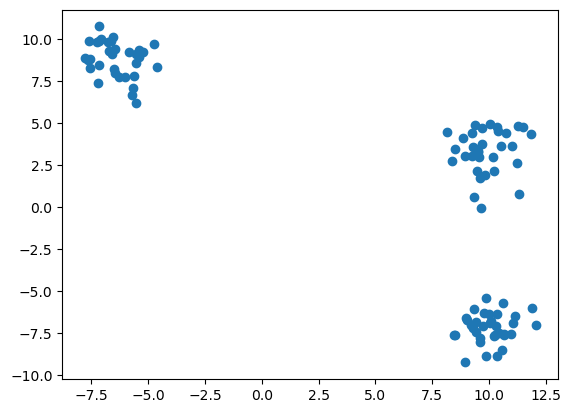

In [3]:
#Génération de données
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=3, cluster_std=1.0)

plt.scatter(X[:,0],X[:,1])

In [4]:
from sklearn.cluster import KMeans

In [4]:
from sklearn.cluster import KMeans

In [7]:
#Les parametre
#n_init=10,maxiter=200,init=K-Means++

model=KMeans(n_clusters=3,n_init=10)
model.fit(X)
model.predict(X)

array([2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2, 2,
       2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0,
       1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

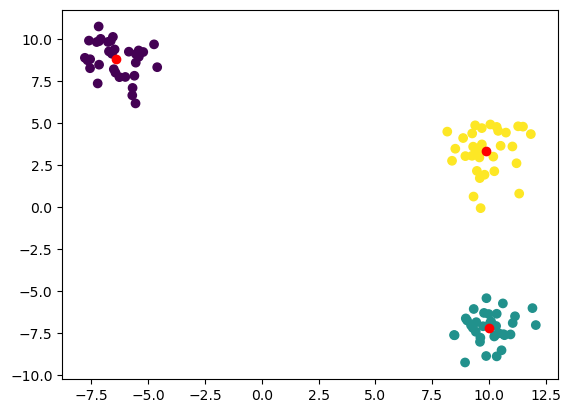

In [13]:
plt.scatter(X[:,0],X[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r')

In [14]:
model.inertia_

192.84459356193585

Pour trouver le bon nombre de clusters : << Eibow Method>> : Détecter une zone de << coude >> dans la minimisation du coût(Inertia_)

In [16]:
inertia=[]
k_range=range(1,30)
for k in k_range:
    model=KMeans(n_clusters=k,n_init=10).fit(X)
    inertia.append(model.inertia_)

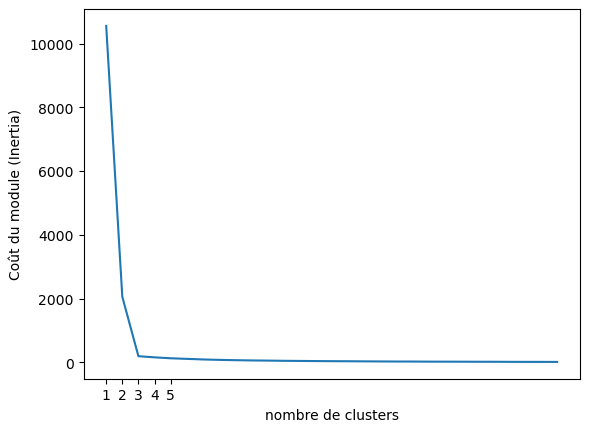

In [18]:
plt.plot(k_range,inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Coût du module (Inertia)')

custom_xticks = [1, 2, 3, 4, 5]  # Les valeurs que vous voulez afficher
plt.xticks(custom_xticks)

plt.show()

# Isolation Forest : Anomaly Detection

In [4]:
#Génération de données
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [18]:
X,y= make_blobs(n_samples=50, centers=1, cluster_std=0.2)
X[-1,:]=np.array([2.25,5])

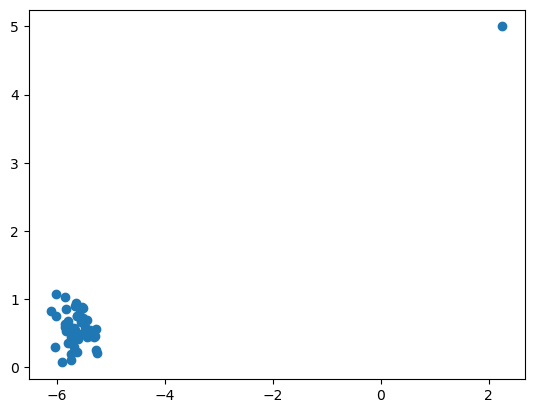

In [19]:
plt.scatter(X[:,0],X[:,1])

In [20]:
from sklearn.ensemble import IsolationForest

In [21]:
model=IsolationForest(contamination=0.02)
model.fit(X)

IsolationForest(contamination=0.02)

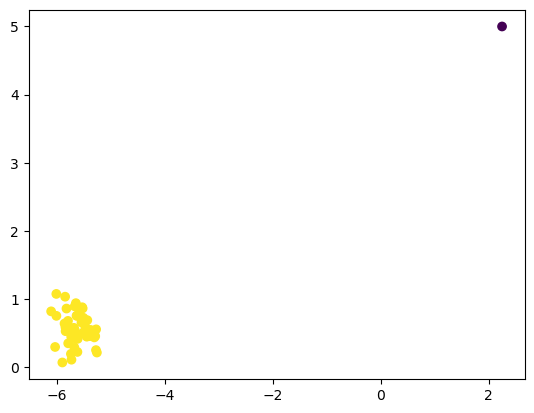

In [22]:
plt.scatter(X[:,0],X[:,1],c=model.predict(X))

## Application :Décontamination Digits

In [23]:
from sklearn.datasets import load_digits

In [24]:
digits=load_digits()
images=digits.images
X=digits.data
y=digits.target


In [26]:
X.shape

(1797, 64)

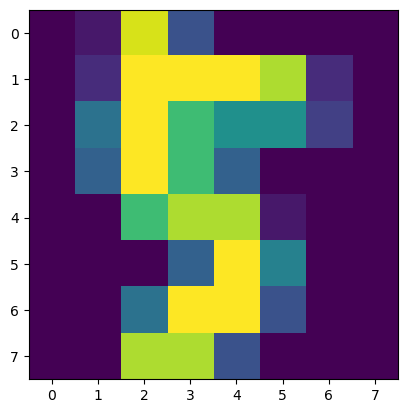

In [33]:
plt.imshow(images[46])

In [34]:
model=IsolationForest(random_state=0,contamination=0.02)

In [35]:
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [36]:
model.predict(X)

#-1: nombre mal écrit
#1=nombre bien écrit

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
outliers=model.predict(X)==-1

In [39]:
outliers

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, '7')

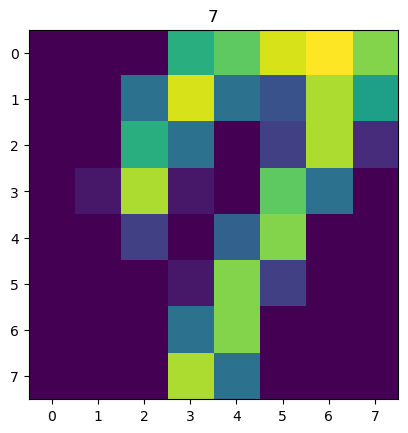

In [42]:
plt.imshow(images[outliers][5])
plt.title(y[outliers][5])

## Reduction de la dimension:PCA

PCA est un transformer.

1. Définir le nombre de composantes
2. Transformer les données avec fit_transform()


.Objectif: Réduire le nombre de variable en conservant 95%-99% de la variance 

model.explained_variance_ratio_:indique le pourcentage de variance préservé pour chaque composante.

consum(explained_variance_ratio_)


### 1. Reduction de dimension

In [44]:
from sklearn.datasets import load_digits
digits=load_digits()
images=digits.images
X=digits.data
y=digits.target

In [45]:
#Importer le transformaur
from sklearn.decomposition import PCA

In [46]:
X.shape

(1797, 64)

In [49]:
model=PCA(n_components=2)
Xreduce=model.fit_transform(X)


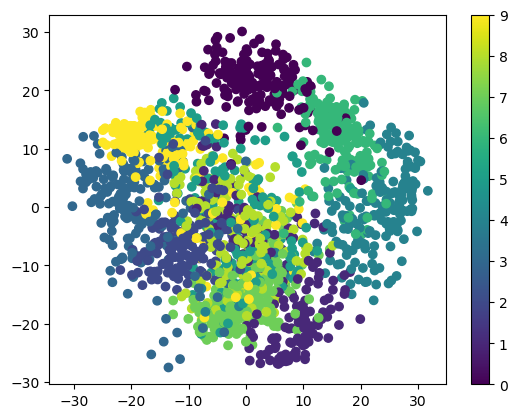

In [52]:
plt.scatter(Xreduce[:,0],Xreduce[:,1],c=y)
plt.colorbar()

In [53]:
model.components_.shape

(2, 64)

In [71]:
model=PCA(n_components=64)
Xreduced=model.fit_transform(X)

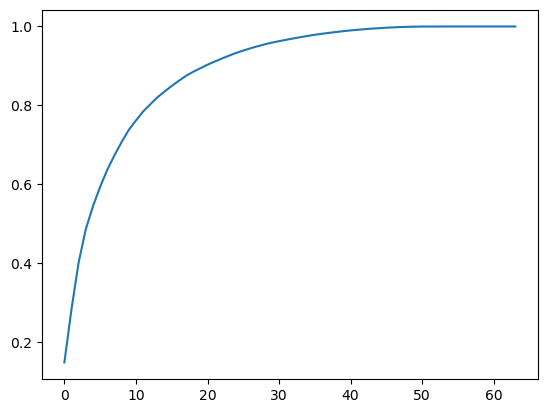

In [72]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [73]:
np.argmax(np.cumsum(model.explained_variance_ratio_)>0.99)

40

In [74]:
model=PCA(n_components=40)
Xreduced=model.fit_transform(X)

In [75]:
X_recovered=model.inverse_transform(Xreduced)

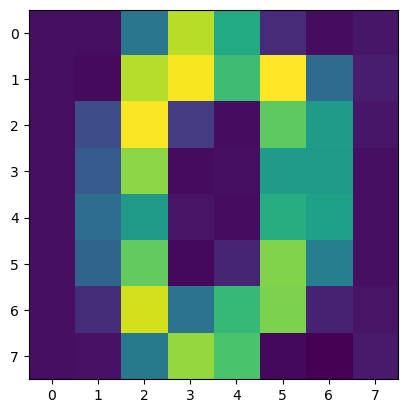

In [76]:
plt.imshow(X_recovered[0].reshape((8,8)))

In [94]:
## Autre technique

model=PCA(n_components=0.99)
X_reduced=model.fit_transform(X)

In [95]:
X_recovered=model.inverse_transform(X_reduced)

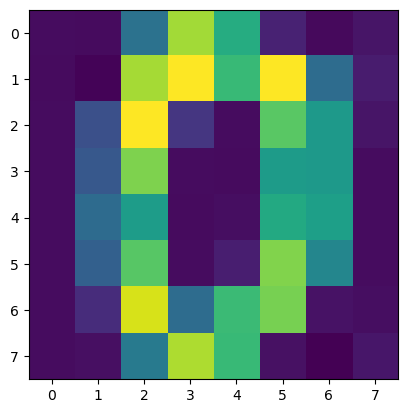

In [96]:
plt.imshow(X_recovered[0].reshape((8,8)))

In [97]:
model.n_components_

41